In [1]:
#standard
import pandas as pd, numpy as np
from numpy.random import randn

#stat

from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

#plotting

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

#statistical method
from pylab import rcParams
import statsmodels.api as sm

import warnings
import itertools
import re
import time

warnings.filterwarnings("ignore")
%matplotlib inline

# Data Cleaning

In [2]:
import os

In [3]:
os.chdir('C:\\Hasan\\Kabir_pankaz\\rawdata')

In [4]:
 #read raw data
calendar=pd.read_csv("calendar.csv")
#read Raw sell_prices data
sell_prices=pd.read_csv("sell_prices.csv")
#Read sales_train_validation raw data
sales_train_validation=pd.read_csv("sales_train_validation.csv")

#make some copy
sell=sell_prices.copy()
cal=calendar.copy()
stv=sales_train_validation.copy()

In [5]:
sales_long = pd.melt(sales_train_validation, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name = 'd', value_name = 'unit_sold')
sales_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sold
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [7]:
# merge 
df_t = pd.merge(sales_long, calendar, how = 'left', on = ['d'])
df_t.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sold,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0


In [8]:
df_ti=df_t[['date','id','unit_sold']]

In [9]:
df_ti.columns=['ds','id','y']

In [10]:
df_ti.head()

,ds,id,y
0,2011-01-29,HOBBIES_1_001_CA_1_validation,0
1,2011-01-29,HOBBIES_1_002_CA_1_validation,0
2,2011-01-29,HOBBIES_1_003_CA_1_validation,0
3,2011-01-29,HOBBIES_1_004_CA_1_validation,0
4,2011-01-29,HOBBIES_1_005_CA_1_validation,0


In [11]:
df_ti.shape

(58327370, 3)

In [12]:
display(df_ti['y'].value_counts())

0      39777094
1       7753194
2       3894493
3       2098127
4       1279524
         ...   
274           1
372           1
371           1
370           1
763           1
Name: y, Length: 419, dtype: int64

In [13]:
df_tim=df_ti.set_index('ds')
df_tim.head()

,id,y
ds,,
2011-01-29,HOBBIES_1_001_CA_1_validation,0
2011-01-29,HOBBIES_1_002_CA_1_validation,0
2011-01-29,HOBBIES_1_003_CA_1_validation,0
2011-01-29,HOBBIES_1_004_CA_1_validation,0
2011-01-29,HOBBIES_1_005_CA_1_validation,0


In [14]:
df=df_tim[df_tim['id']=='HOBBIES_1_001_CA_1_validation']['y']

In [15]:
%%time
df_tim.dropna(inplace = True)
df_tim.shape

Wall time: 6.98 s


(58327370, 2)

# Generalized additive model

In [23]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


In [24]:
from pygam import LogisticGAM


In [34]:
df1=df[df['id']=='HOBBIES_1_002_CA_1_validation']


In [37]:
X_train = df1[train_cols]
y_train = df1["sales"]

In [27]:
import numpy as np

In [29]:
from pygam import GAM, s, te

In [30]:
from pygam import LinearGAM, s, f

In [31]:
from pygam import PoissonGAM, s, te

In [32]:
gam=LogisticGAM().fit(X_train,y_train/5)

C:\Users\Hasan\anaconda3\lib\site-packages\pygam\pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
C:\Users\Hasan\anaconda3\lib\site-packages\pygam\pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


In [33]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     79.9265
Link Function:                        LogitLink Log Likelihood:                                       -inf
Number of Samples:                         1509 AIC:                                                   inf
                                                AICc:                                                  inf
                                                UBRE:                                               2.3105
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1683
Feature Function                  Lam

C:\Users\Hasan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [34]:
gam = LogisticGAM(f(0) + s(1) + s(2)).fit(X_train,y_train/5)

C:\Users\Hasan\anaconda3\lib\site-packages\pygam\pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
C:\Users\Hasan\anaconda3\lib\site-packages\pygam\pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll


In [35]:
gam.accuracy(X_train,y_train/5)

0.7760106030483764

In [ ]:
lam = np.logspace(-3, 3, 11)
lams = [lam] * 25
#gam.gridsearch(X_train,y_train/5, lam=lams)

# Facebook Prophet

In [23]:
#pip install pandas matplotlib numpy cython

Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [7]:
#conda install -c conda-forge fbprophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Hasan\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    convertdate-2.2.1          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py37hfa6e2cd_0         741 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.2            |     pyh9f0ad1d_0          59 KB  conda-forge
    korean_lunar_calendar-0.2.1|     pyh9f0ad1d_0          10 KB  conda-forge
    libpython-2.0              |   py37hc8dfbb8_0          48 KB  conda-forge
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    m2w64-binutils-2.25.1      |                5        44.3 MB
    m2w64-bzi



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [17]:
import matplotlib.pyplot as plt

In [19]:
from fbprophet import Prophet

In [72]:
df=df_ti[df_ti['id']=='HOBBIES_1_001_CA_1_validation'][['ds','y']]


In [73]:
df.shape


(1913, 2)

In [74]:
df.head

<bound method NDFrame.head of                   ds  y
0         2011-01-29  0
30490     2011-01-30  0
60980     2011-01-31  0
91470     2011-02-01  0
121960    2011-02-02  0
...              ... ..
58174920  2016-04-20  1
58205410  2016-04-21  3
58235900  2016-04-22  0
58266390  2016-04-23  1
58296880  2016-04-24  1

[1913 rows x 2 columns]>

In [23]:
m = Prophet(daily_seasonality=True)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [24]:
future = m.make_future_dataframe(periods=28)
future.tail()

,ds
1936,2016-05-18
1937,2016-05-19
1938,2016-05-20
1939,2016-05-21
1940,2016-05-22


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1936,2016-05-18,0.575150,-0.253407,1.305904
1937,2016-05-19,0.567878,-0.198000,1.379266
1938,2016-05-20,0.623709,-0.187122,1.378957
1939,2016-05-21,0.775442,0.037223,1.521291
1940,2016-05-22,0.657890,-0.054822,1.483034


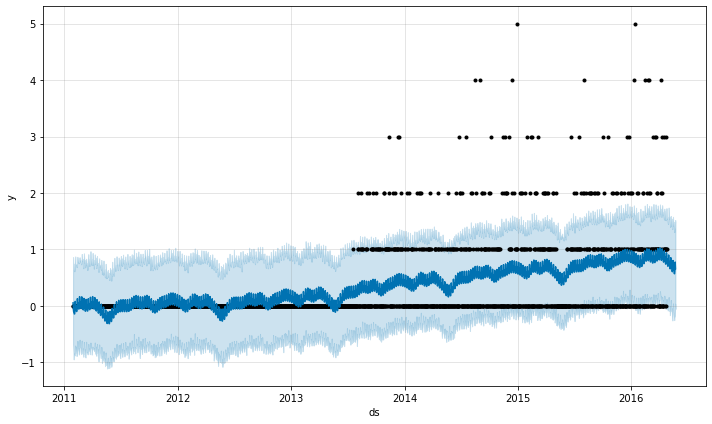

In [26]:
fig1 = m.plot(forecast)

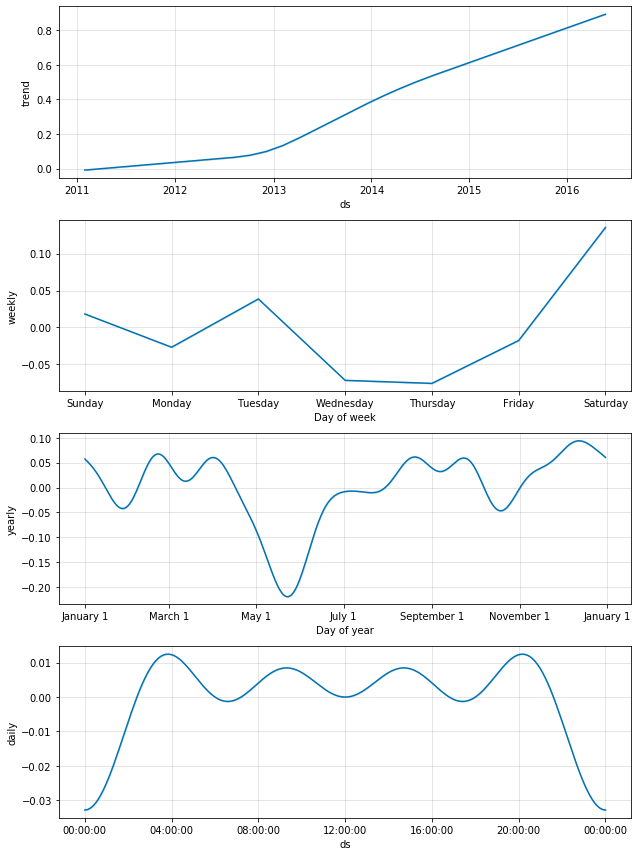

In [27]:
fig2 = m.plot_components(forecast)

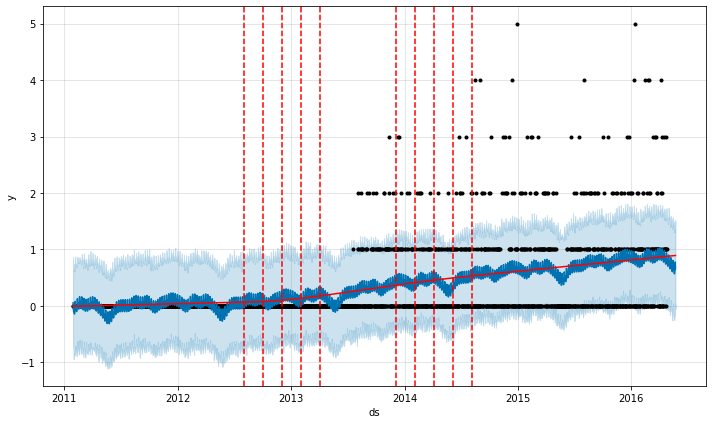

In [28]:

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

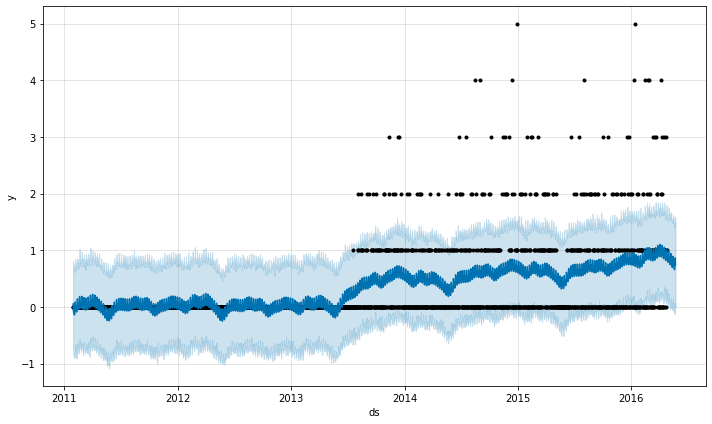

In [29]:
m = Prophet(changepoint_prior_scale=0.9,daily_seasonality=True)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

# Using logistic growth

In [30]:
m = Prophet(growth='logistic',daily_seasonality=True)
df['cap'] = 8.5

In [31]:
m.fit(df)


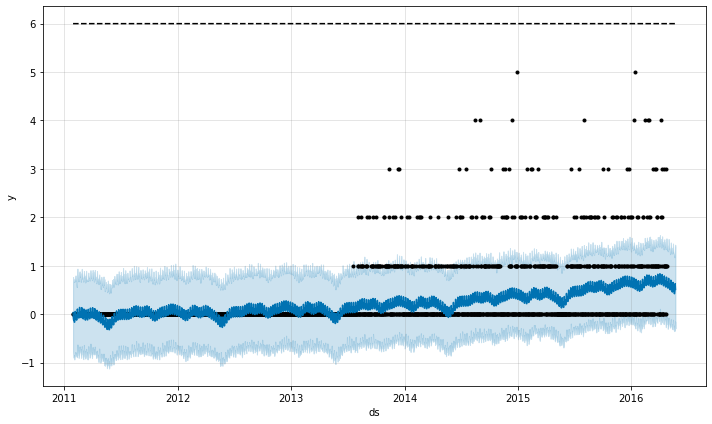

In [32]:
future = m.make_future_dataframe(periods=28)
future['cap'] = 6
fcst = m.predict(future)
fig = m.plot(fcst)

In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1936,2016-05-18,0.430258,-0.344005,1.145216
1937,2016-05-19,0.422913,-0.335198,1.180412
1938,2016-05-20,0.478724,-0.319549,1.257888
1939,2016-05-21,0.630510,-0.169212,1.445942
1940,2016-05-22,0.512762,-0.342954,1.365957


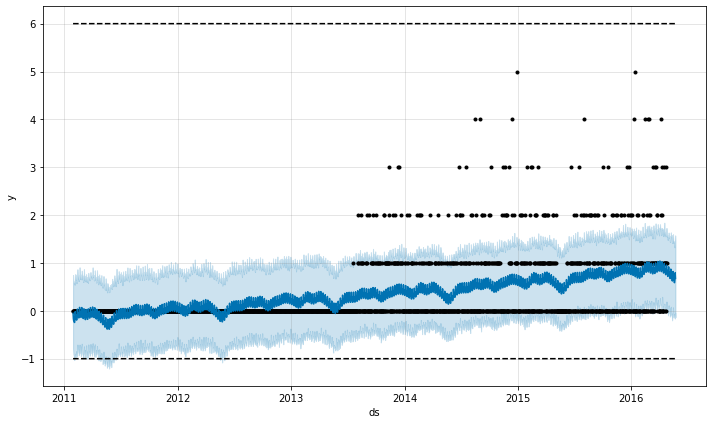

In [34]:
df['cap'] = 6
df['floor'] = -1
future['cap'] = 6
future['floor'] = -1
m = Prophet(growth='logistic',daily_seasonality=True)
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

# Holiday effects

In [75]:
event1=df_t[['date','id','event_name_1']]

In [76]:
event1.columns=['ds','id','holiday']

In [77]:
holidays=event1[event1['id']=='HOBBIES_1_001_CA_1_validation'][['ds','holiday']]

In [78]:
#holidays['holiday']=pd.factorize(holidays['holiday'])[0]

In [79]:
holidays.dropna(inplace = True)

In [80]:
holidays.head()

,ds,holiday
243920,2011-02-06,SuperBowl
487840,2011-02-14,ValentinesDay
701270,2011-02-21,PresidentsDay
1189110,2011-03-09,LentStart
1402540,2011-03-16,LentWeek2


In [81]:
m = Prophet(holidays=holidays,daily_seasonality=True)
forecast = m.fit(df).predict(future)


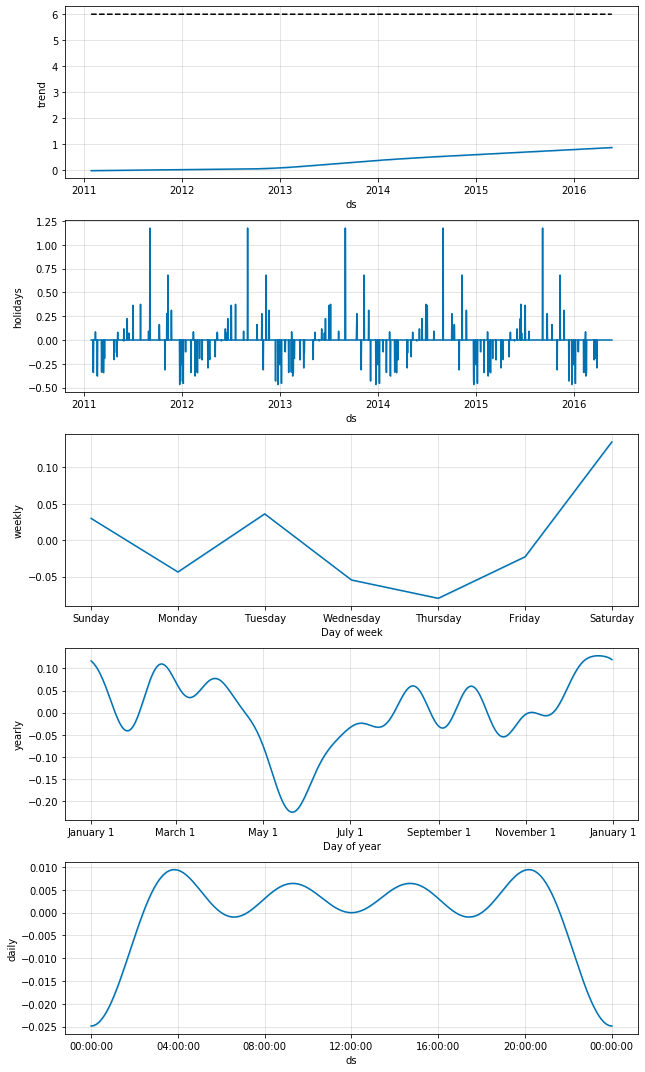

In [82]:
fig = m.plot_components(forecast)

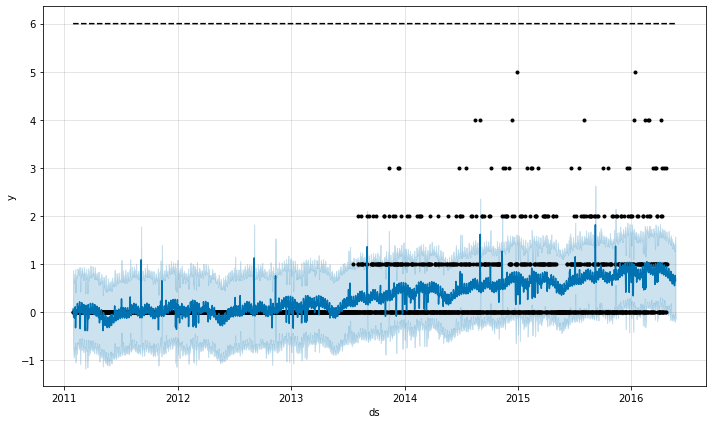

In [83]:
fig=m.plot(forecast)

In [84]:
store=df_t[['date','id','snap_CA','snap_TX','snap_WI']]
store.columns=['ds','id','snap_CA','snap_TX','snap_WI']

In [85]:
store=store[store['id']=='HOBBIES_1_001_CA_1_validation'][['ds','snap_CA','snap_TX','snap_WI']]
store.dropna(inplace = True)

In [86]:
store.head()

,ds,snap_CA,snap_TX,snap_WI
0,2011-01-29,0,0,0
30490,2011-01-30,0,0,0
60980,2011-01-31,0,0,0
91470,2011-02-01,1,1,0
121960,2011-02-02,1,0,1


In [87]:
df['ca']=store.snap_CA

In [88]:
df['tx']=store.snap_TX

In [89]:
df['wi']=store.snap_WI

In [90]:
df.head()

,ds,y,ca,tx,wi
0,2011-01-29,0,0,0,0
30490,2011-01-30,0,0,0,0
60980,2011-01-31,0,0,0,0
91470,2011-02-01,0,1,1,0
121960,2011-02-02,0,1,0,1


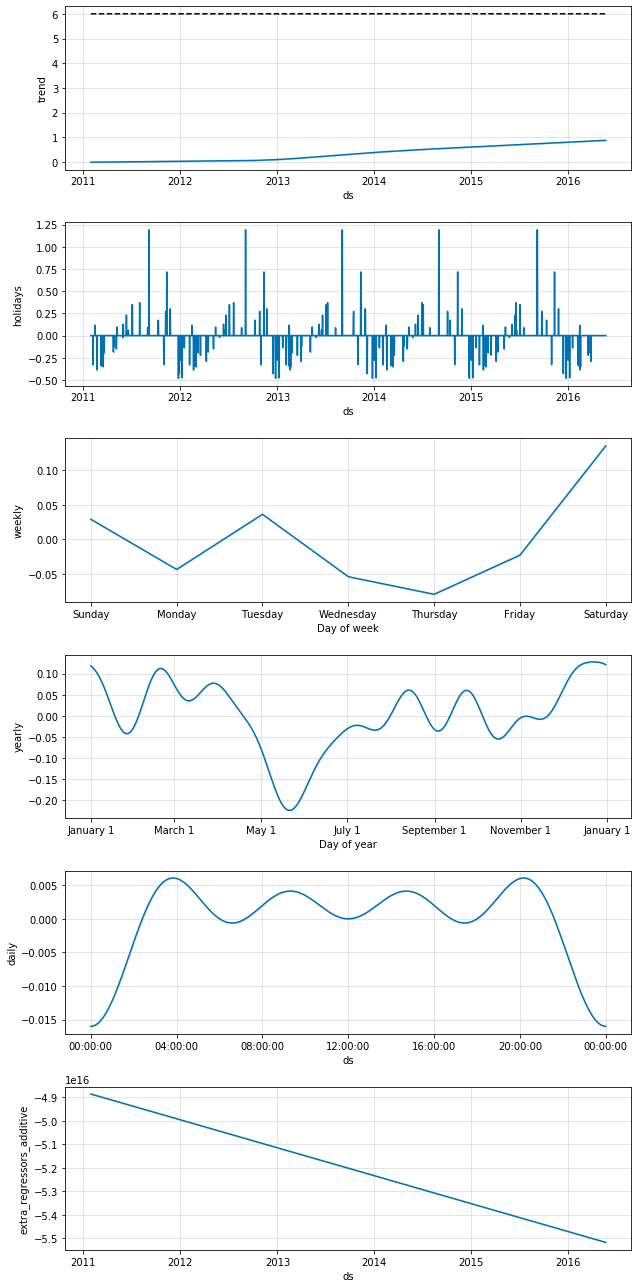

In [91]:
m = Prophet(holidays=holidays,daily_seasonality=True)
m.add_regressor('ca')
m.add_regressor('tx')
m.add_regressor('wi')
m.fit(df)

future['ca'] = future['ds']
future['tx'] = future['ds']
future['wi'] = future['ds']
forecast = m.predict(future)
fig = m.plot_components(forecast)

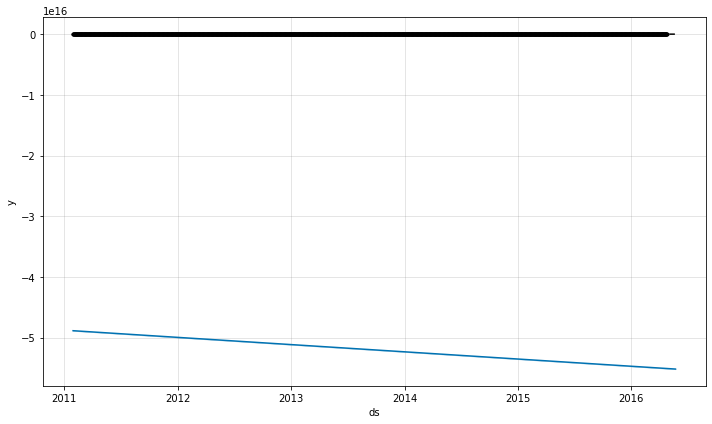

In [92]:
fig=m.plot(forecast)

In [62]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1936,2016-05-18,-5.515457e+16,-5.515457e+16,-5.515457e+16
1937,2016-05-19,-5.515783e+16,-5.515783e+16,-5.515783e+16
1938,2016-05-20,-5.516109e+16,-5.516109e+16,-5.516109e+16
1939,2016-05-21,-5.516434e+16,-5.516434e+16,-5.516434e+16
1940,2016-05-22,-5.516760e+16,-5.516760e+16,-5.516760e+16


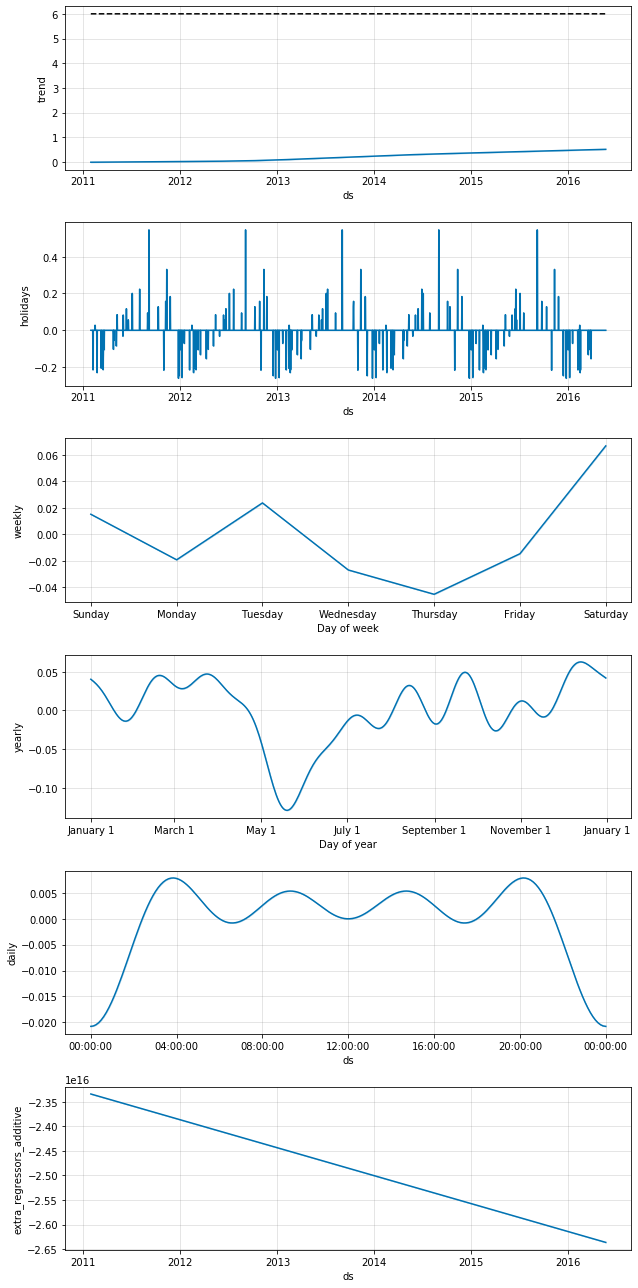

In [67]:
#df['y'] = df['y'] + 1
#df['y'] = np.log(df['y'])
m = Prophet(holidays=holidays,daily_seasonality=True)
m.add_regressor('ca')
m.add_regressor('tx')
m.add_regressor('wi')
m.fit(df)

future['ca'] = future['ds']
future['tx'] = future['ds']
future['wi'] = future['ds']
forecast = m.predict(future)
fig = m.plot_components(forecast)


In [71]:
#get forecast
#forecast['yhat'] = np.exp(forecast['yhat'])-1
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(35)

,ds,yhat,yhat_lower,yhat_upper
1906,2016-04-18,-1.090804e+16,-1.090804e+16,-1.090804e+16
1907,2016-04-19,-1.090868e+16,-1.090868e+16,-1.090868e+16
1908,2016-04-20,-1.090933e+16,-1.090933e+16,-1.090933e+16
1909,2016-04-21,-1.090997e+16,-1.090997e+16,-1.090997e+16
1910,2016-04-22,-1.091062e+16,-1.091062e+16,-1.091062e+16
1911,2016-04-23,-1.091126e+16,-1.091126e+16,-1.091126e+16
1912,2016-04-24,-1.091191e+16,-1.091191e+16,-1.091191e+16
1913,2016-04-25,-1.091255e+16,-1.091255e+16,-1.091255e+16
1914,2016-04-26,-1.091320e+16,-1.091320e+16,-1.091320e+16
1915,2016-04-27,-1.091384e+16,-1.091384e+16,-1.091384e+16


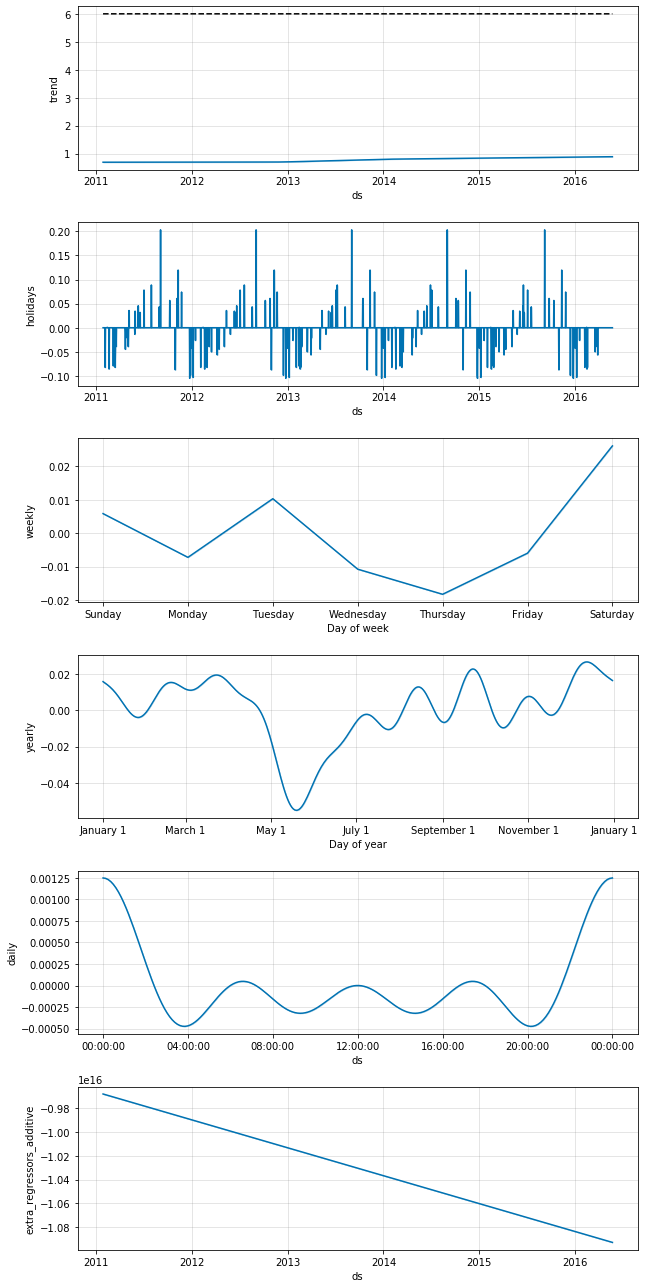

In [70]:
df['y'] = df['y'] + 1
df['y'] = np.log(df['y'])
m = Prophet(holidays=holidays,daily_seasonality=True)
m.add_regressor('ca')
m.add_regressor('tx')
m.add_regressor('wi')
m.fit(df)

future['ca'] = future['ds']
future['tx'] = future['ds']
future['wi'] = future['ds']
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [93]:
pwd

'C:\\Hasan\\Kabir_pankaz\\rawdata'